# Regression from Microsoft Learn- part 1

In [18]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

### Data Preparation

In [19]:
# load training dataset, derive a feature, display summary statistics
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


In [20]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5


In [21]:
# separate features and label
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print (f'Training Set: {X_train.shape[0]} rows\nTest Set: {X_test.shape[0]} rows')

Training Set: 511 rows
Test Set: 220 rows


### Experimenting with another Linear Algorithm
The Lasso Algorithm is a linear regression algorithm that uses a penalty term to reduce the complexity of the model. It is a good choice when you have a large number of features and want to reduce the number of features used by the model. The penalty term is a tuning parameter that controls the amount of reduction in the model complexity. The Lasso algorithm is also known as L1 regularization.

In [22]:
from sklearn.linear_model import Lasso

# fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print(model, '\n')

Lasso() 



In [23]:
# evaluate the model using the test set
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 201155.70593338404
RMSE: 448.5038527519959
R2: 0.6056468637824488


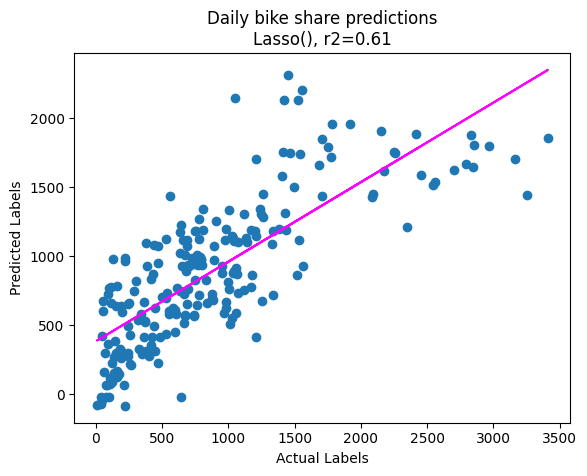

In [24]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title(f'Daily bike share predictions\n{model}, r2={round(r2, 2)}')

# overlay a regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),color='magenta')
plt.show()

### Experimenting with a Decision Tree algorithm

In [25]:
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor

# train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print(model, '\n')

# visualize the tree
#tree = export_text(model)
tree = export_text(model, feature_names=['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed'])
print(tree)

DecisionTreeRegressor() 

|--- temp <= 0.45
|   |--- workingday <= 0.50
|   |   |--- atemp <= 0.32
|   |   |   |--- hum <= 0.41
|   |   |   |   |--- mnth <= 2.50
|   |   |   |   |   |--- weekday <= 3.00
|   |   |   |   |   |   |--- windspeed <= 0.22
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |   |--- windspeed >  0.22
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |   |--- weekday >  3.00
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |--- mnth >  2.50
|   |   |   |   |   |--- hum <= 0.40
|   |   |   |   |   |   |--- season <= 1.50
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |   |--- season >  1.50
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |--- hum >  0.40
|   |   |   |   |   |   |--- atemp <= 0.28
|   |   |   |   |   |   |   |--- value: [532.00]
|   |   |   |   |   |   |--- atemp >  0.28
|   |   |   |   |   |   |   |--- value: [710.00]
|   |   |   |--- hum >  0.41
|   |   |   

In [26]:
# evaluate the model using the test set
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 239786.16818181818
RMSE: 489.6796587380552
R2: 0.5299142671329226


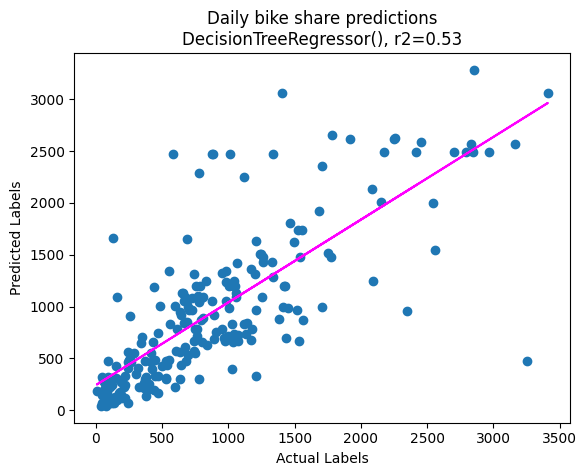

In [27]:
# plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title(f'Daily bike share predictions\n{model}, r2={round(r2, 2)}')

# overlay a regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),color='magenta')
plt.show()

The tree model hasn't really improved over the linear model. The tree model is more complex than the linear model, and it is more likely to overfit the training data. The tree model is also more difficult to interpret than the linear model. (copilot said that last sentence). 

### Experimenting with an Ensemble algorithm
Random Forest is an ensemble algorithm that combines the predictions from multiple decision trees. The predictions from each decision tree are averaged to get the final prediction. The random forest algorithm is more accurate than the decision tree algorithm. It is also more complex and more difficult to interpret.

This is a bagging algorithm. Bagging is an ensemble method that combines the predictions from multiple models. The models are trained on different subsets of the training data. The predictions from each model are averaged to get the final prediction. Bagging reduces the variance of the model, but it doesn't reduce the bias. Bagging is a good choice when you have a large number of features and want to reduce the variance of the model.

In [28]:
from sklearn.ensemble import RandomForestRegressor

# train the model
model = RandomForestRegressor().fit(X_train, y_train)
print(model, '\n')

RandomForestRegressor() 



In [29]:
# evaluate the model using the test set
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 110497.50792636363
RMSE: 332.41165431790085
R2: 0.7833765709364675


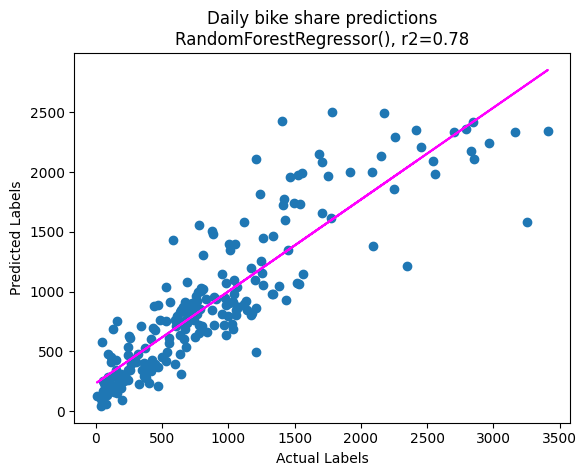

In [30]:
# plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title(f'Daily bike share predictions\n{model}, r2={round(r2, 2)}')

# overlay a regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),color='magenta')
plt.show()

We can also try a boosting algorithm. Boosting is an ensemble method that combines the predictions from multiple models. The models are trained sequentially, with each model learning from the mistakes of the previous model. The predictions from each model are combined to get the final prediction. Boosting reduces the bias of the model, but it doesn't reduce the variance. Boosting is a good choice when you have a small number of features and want to reduce the bias of the model.

We will use a gradient boosting estimator here. Gradient boosting is a boosting algorithm that uses a gradient descent algorithm to find the best combination of weak learners. The weak learners are decision trees with a single split. The gradient boosting algorithm is more accurate than the random forest algorithm. It is also more complex and more difficult to interpret.

Just a thought here but it seems kinda like bagging is like doing things in parallel and boosting is like doing things in sequence/series. Just the electrical engineer in me thinking out loud.

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

# train the model
model = GradientBoostingRegressor().fit(X_train, y_train)
print(model, '\n')

GradientBoostingRegressor() 



In [32]:
# evaluate the model using the test set
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 103957.91857444245
RMSE: 322.42505885002555
R2: 0.7961970254124597


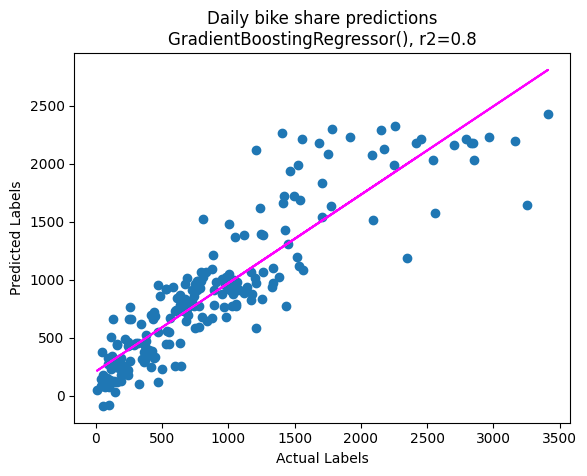

In [33]:
# plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title(f'Daily bike share predictions\n{model}, r2={round(r2, 2)}')

# overlay a regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),color='magenta')
plt.show()